<a href="https://colab.research.google.com/github/rodrigoluciano/r-d_ciencia_e_analise_de_dados/blob/main/VideoGameSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
import missingno as mn
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
%matplotlib inline

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from IPython.display import display, HTML

Supress warning

In [3]:
import warnings
warnings.filterwarnings('ignore')

 Importing the input files

In [9]:
import os
for dirname, _, filenames in os.walk('./vgsales.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
vgdata = pd.read_csv('./vgsales.csv')
vgdata.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Inspect Data Frames

In [13]:
#database dimension
print("Database dimension     :",vgdata.shape)
print("Database size          :",vgdata.size)

Database dimension     : (16598, 11)
Database size          : 182578


In [14]:
#checking numerical columns statistics
vgdata.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
#info about the column types etc. 
vgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


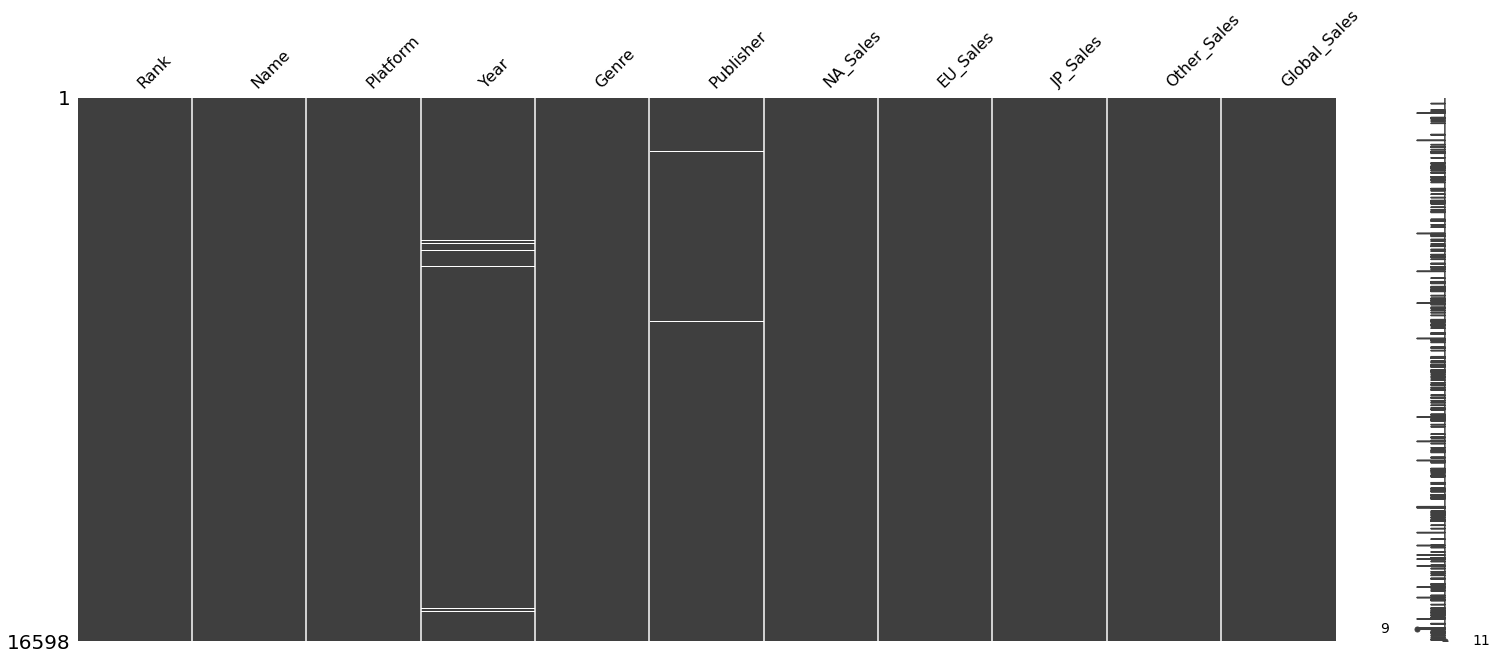

In [16]:
mn.matrix(vgdata)

In [17]:
#Column wise null values in train data set 
null_vgd_perc = pd.DataFrame((vgdata.isnull().sum())*100/vgdata.shape[0]).reset_index()
null_vgd_perc.columns = ['Column Name', 'Null Values Percentage']
null_vgd_value = pd.DataFrame(vgdata.isnull().sum()).reset_index()
null_vgd_value.columns = ['Column Name', 'Null Values']
null_vgd = pd.merge(null_vgd_value, null_vgd_perc, on='Column Name')
null_vgd

,Column Name,Null Values,Null Values Percentage
0,Rank,0,0.000000
1,Name,0,0.000000
2,Platform,0,0.000000
3,Year,271,1.632727
4,Genre,0,0.000000
5,Publisher,58,0.349440
6,NA_Sales,0,0.000000
7,EU_Sales,0,0.000000
8,JP_Sales,0,0.000000
9,Other_Sales,0,0.000000


Year Imputation


In [18]:
year_data = vgdata['Year']
print("Max Year Value: ", year_data.max())

Max Year Value:  2020.0


In [19]:
max_entry = year_data.idxmax()
max_entry = vgdata.iloc[max_entry]
pd.DataFrame(max_entry).T

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [20]:
vgdata['Year'] = vgdata['Year'].replace(2020.0, 2009.0)
print("Max Year Value: ", year_data.max())

Max Year Value:  2017.0


In [23]:
game_missedyear = vgdata[vgdata['Year'].isnull()]["Name"].unique()
print("total number of unique games in that missing year is : ",len(game_missedyear))

total number of unique games in that missing year is :  233


total number of unique games in that missing year is

In [24]:
vgdata['Year'] = vgdata['Year'].fillna(2009.0)
vgdata['Year'].isnull().sum()

0

In [26]:
vgdata['Year']=vgdata['Year'].astype('int')
vgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [27]:
print("Total Publisher missing for ", vgdata['Publisher'].isnull().sum(),' rows')

Total Publisher missing for  58  rows


In [28]:
games = vgdata['Name'].unique()
publisher = vgdata['Publisher'].unique()
platforms = vgdata['Platform'].unique()
genres = vgdata['Genre'].unique()

In [29]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(games),
    title = {'text': "Games",'font': {'color': 'gold','size':20}},
    number={'font':{'color': 'gold','size':50}},
    domain = {'row': 0, 'column': 0}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(publisher),
    title = {'text': "Publishers",'font': {'color': 'green','size':20}},
    number={'font':{'color': 'green','size':50}},
    domain = {'row': 0, 'column': 1}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(platforms),
    title = {'text': "Platforms",'font': {'color': 'darkviolet','size':20}},
    number={'font':{'color': 'darkviolet','size':50}},
    domain = {'row': 0, 'column': 2}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(genres),
    title = {'text': "Genres",'font': {'color': 'deepskyblue','size':20}},
    number={'font':{'color': 'deepskyblue','size':50}},
    domain = {'row': 0, 'column': 3}
))

fig.update_layout(
    grid = {'rows': 1, 'columns': 4, 'pattern': "independent"})
fig.show()

Data Cleaning